In [15]:
from TPED.projects.profile_tools.utils.read_GENE_prof import GENEProfileReader

from TPED.projects.utils.git_helpers import get_git_root
import matplotlib.pyplot as plt
import os

In [16]:
git_path = get_git_root()

In [17]:
profile_dir = os.path.join(git_path, 'data/profiles/NSTX129015/output_profiles_test')

data_dict = GENEProfileReader(profile_dir).output_profile_dict()

data_dict.keys()

dict_keys(['Te', 'ne', 'Ti', 'ni', 'Tz', 'nz'])

In [18]:
pfile_e = os.path.join(git_path, 'data/profiles/NSTX129015/profiles_e')
pfile_i = os.path.join(git_path, 'data/profiles/NSTX129015/profiles_i')
pfile_z = os.path.join(git_path, 'data/profiles/NSTX129015/profiles_z')
pfile = os.path.join(git_path, 'data/profiles/NSTX129015/p129015.00400_x8099')

plist = [pfile_e, pfile_i, pfile_z]
# plist = [pfile_e, pfile_i]
# plist = pfile_e


input_path = plist
data_dict = GENEProfileReader(plist).output_profile_dict()

data_dict.keys()
# data_dict['ne'].keys()



dict_keys(['Te', 'ne', 'Ti', 'ni', 'Tz', 'nz'])

In [5]:
data_dict['ne']['units']

<Quantity(1e+19, '1 / meter ** 3')>

/tmp/ipykernel_1934162/397981508.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_dict['Te']['rho_tor'], data_dict['ne']['data'], cmap='viridis', label=data_dict['Te']['units'])
/tmp/ipykernel_1934162/397981508.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_dict['ni']['rho_tor'], data_dict['ni']['data'], cmap='viridis', label=data_dict['ni']['units'])


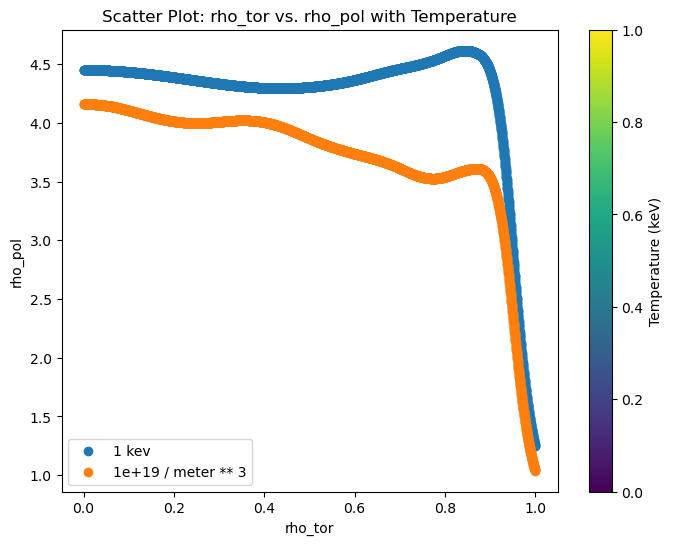

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(data_dict['Te']['rho_tor'], data_dict['ne']['data'], cmap='viridis', label=data_dict['Te']['units'])
plt.scatter(data_dict['ni']['rho_tor'], data_dict['ni']['data'], cmap='viridis', label=data_dict['ni']['units'])
# plt.scatter(data_dict['Tz']['rho_tor'], data_dict['nz']['data'], cmap='viridis', label='Te(kev)')
plt.colorbar(label='Temperature (keV)')
plt.xlabel('rho_tor')
plt.ylabel('rho_pol')
plt.title('Scatter Plot: rho_tor vs. rho_pol with Temperature')
plt.legend()
plt.show()

In [19]:
profile_xarray = GENEProfileReader(plist).output_profile_xarray()
profile_xarray

<xarray.Dataset> Size: 288kB
Dimensions:  (index: 4000)
Coordinates:
  * index    (index) int64 32kB 0 1 2 3 4 5 6 ... 3994 3995 3996 3997 3998 3999
    rho_tor  (index) float64 32kB 0.001089 0.001339 0.001588 ... 0.9993 0.9996
    rho_pol  (index) float64 32kB nan 0.004994 0.007064 ... 0.9999 1.0 1.0
Data variables:
    Te       (index) float64 32kB 0.8107 0.8107 0.8107 ... 0.03055 0.03044
    ne       (index) float64 32kB 4.452 4.452 4.452 4.452 ... 1.253 1.248 1.244
    Ti       (index) float64 32kB 0.9889 0.9889 0.9889 ... 0.1136 0.1136 0.1136
    ni       (index) float64 32kB 4.164 4.164 4.164 4.164 ... 1.044 1.041 1.037
    Tz       (index) float64 32kB 0.9889 0.9889 0.9889 ... 0.1136 0.1136 0.1136
    nz       (index) float64 32kB 0.04792 0.04793 0.04794 ... 0.03458 0.03444

In [24]:
'TE' in profile_xarray.data_vars
rhotMidPed = 0.4

import numpy as np

# Find the index where 'rho_tor' is closest to rhotMidPed
midPedIndex = np.argmin(abs(profile_xarray['rho_tor'].values - rhotMidPed))

# Extract 'Te' and 'Ti' at the midPedIndex using the index coordinate directly
teMidPed = profile_xarray['Te'].isel(index=midPedIndex).item()  # Get scalar value
tiMidPed = profile_xarray['Ti'].isel(index=midPedIndex).item()  # Get scalar value

print(midPedIndex, teMidPed, tiMidPed)

1598 0.6784384644916963 0.6445451628819931


In [8]:
profile_test_save = '/global/homes/j/joeschm/tools/TPED/data/profiles/NSTX129015/output_profiles_test'

profile_object = GENEProfileReader(plist)
profile_xarray = profile_object.output_profile_xarray()

profile_object.write_GENEPfile(profile_test_save, profile_xarray)

In [26]:
pfile_e_TEST = os.path.join(profile_test_save, 'profiles_e')
pfile_i_TEST = os.path.join(profile_test_save, 'profiles_i')
pfile_z_TEST = os.path.join(profile_test_save, 'profiles_z')

plist_TEST = [pfile_e_TEST, pfile_i_TEST, pfile_z_TEST]
profile_xarray_TEST = GENEProfileReader(plist_TEST).output_profile_xarray()

profile_xarray_TEST['Tz'] = profile_xarray_TEST['Tz'] * 1.5

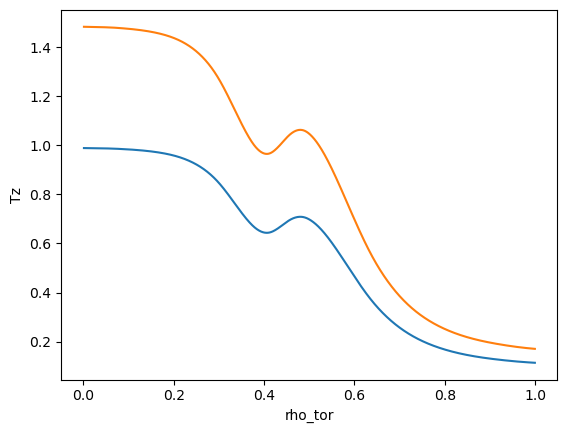

In [27]:
profile_xarray['Tz'].plot(x='rho_tor')
profile_xarray_TEST['Tz'].plot(x='rho_tor')
plt.show()

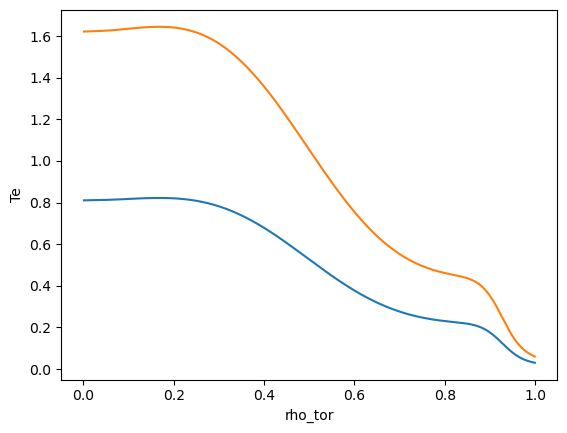

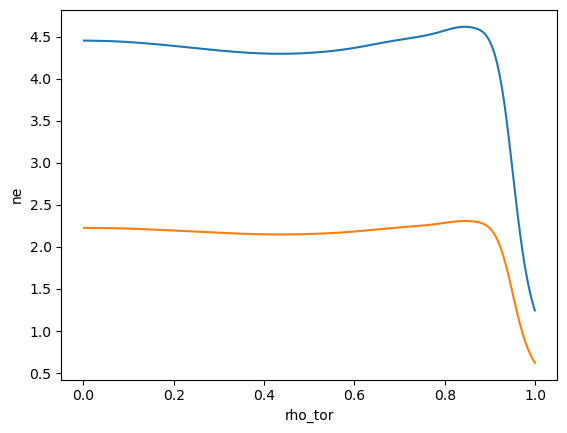

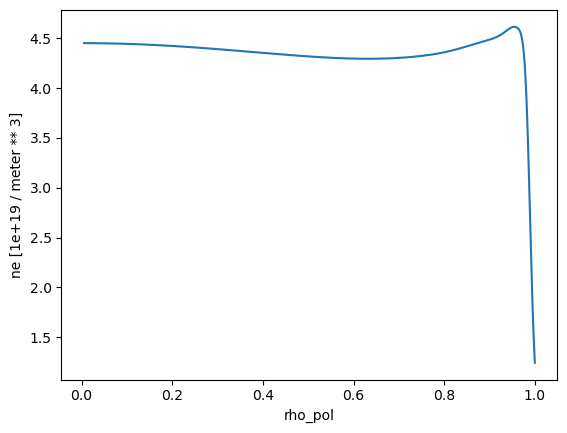

In [14]:
profile_xarray['Te'].plot(x='rho_tor')
(profile_xarray['Te']*2).plot(x='rho_tor')
plt.show()

profile_xarray['ne'].plot(x='rho_tor')
(profile_xarray['ne']*0.5).plot(x='rho_tor')
plt.show()

profile_xarray['ne'].plot(x='rho_pol')
plt.show()